# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [2]:
# os.chdir("SalesAnalysis/Sales_Data")

In [22]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Misc',
 'README.md',
 'SalesAnalysis',
 'Sales_Analysis.ipynb']

In [11]:
# file_names = [file for file in os.listdir("./SalesAnalysis/Sales_Data")]
# file_names

In [39]:
extension = 'csv'
file_names = [file for file in glob.glob("SalesAnalysis/Sales_Data/*.{}".format(extension))]
file_names

['SalesAnalysis/Sales_Data\\Sales_April_2019.csv',
 'SalesAnalysis/Sales_Data\\Sales_August_2019.csv',
 'SalesAnalysis/Sales_Data\\Sales_December_2019.csv',
 'SalesAnalysis/Sales_Data\\Sales_February_2019.csv',
 'SalesAnalysis/Sales_Data\\Sales_January_2019.csv',
 'SalesAnalysis/Sales_Data\\Sales_July_2019.csv',
 'SalesAnalysis/Sales_Data\\Sales_June_2019.csv',
 'SalesAnalysis/Sales_Data\\Sales_March_2019.csv',
 'SalesAnalysis/Sales_Data\\Sales_May_2019.csv',
 'SalesAnalysis/Sales_Data\\Sales_November_2019.csv',
 'SalesAnalysis/Sales_Data\\Sales_October_2019.csv',
 'SalesAnalysis/Sales_Data\\Sales_September_2019.csv']

In [2]:
# all_months_df = pd.concat([pd.read_csv(file) for file in file_names])

# all_months_df.to_csv("all_months_data.csv",index=False, encoding='utf-8-sig')
all_months_df = pd.read_csv("all_months_data.csv")

# Cleaning up the Data

In [3]:
all_months_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
all_months_df.dropna(axis=0, how='all', inplace=True)
all_months_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
# sum(all_months_df['Order Date'].str.isnumeric())
type(all_months_df['Quantity Ordered'])

pandas.core.series.Series

In [5]:
all_months_df = all_months_df[all_months_df['Order Date'].str[0:2] != 'Or']
all_months_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [8]:
# converting type to numeric 
all_months_df['Quantity Ordered'] = pd.to_numeric(all_months_df.loc[:,'Quantity Ordered'])
all_months_df['Price Each'] = pd.to_numeric(all_months_df.loc[:,'Price Each'])

<ipython-input-8-6c3ac287f29c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_df['Quantity Ordered'] = pd.to_numeric(all_months_df.loc[:,'Quantity Ordered'])
<ipython-input-8-6c3ac287f29c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_df['Price Each'] = pd.to_numeric(all_months_df.loc[:,'Price Each'])


In [9]:
all_months_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [10]:
all_months_df['Quantity Ordered'].values

array([2, 1, 1, ..., 1, 1, 1], dtype=int64)

# Analysis

**Creating Month column**

In [11]:
all_months_df['Month'] = all_months_df['Order Date'].str[0:2].astype('int32')
all_months_df

<ipython-input-11-66a784a7e960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_df['Month'] = all_months_df['Order Date'].str[0:2].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [12]:
clean_data = all_months_df.sort_values('Month')

In [13]:
# clean_data['Quantity Ordered']
clean_data.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

**Creating Sales column**

In [14]:
clean_data['Sales'] = clean_data['Quantity Ordered'] * clean_data['Price Each']
clean_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
69397,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1,2.99
70773,144300,Apple Airpods Headphones,1,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1,150.00
70772,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1,389.99
70771,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1,14.95
70770,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1,300.00
...,...,...,...,...,...,...,...,...
47162,311693,27in FHD Monitor,1,149.99,12/06/19 18:05,"594 9th St, Dallas, TX 75001",12,149.99
47163,311694,AAA Batteries (4-pack),1,2.99,12/19/19 07:35,"905 11th St, Atlanta, GA 30301",12,2.99
47164,311695,Wired Headphones,1,11.99,12/21/19 21:06,"107 Lakeview St, San Francisco, CA 94016",12,11.99
47142,311673,USB-C Charging Cable,1,11.95,12/26/19 22:24,"169 Forest St, San Francisco, CA 94016",12,11.95


### Sales by Month

In [15]:
# clean_data.groupby('Month').sum().sort_values('Sales',ascending=False)
monthly_sales = clean_data.groupby('Month').sum()
monthly_sales.sort_values('Sales',ascending=False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4.588415e+06,4.613443e+06
10,22703,3.715555e+06,3.736727e+06
4,20558,3.367671e+06,3.390670e+06
11,19798,3.180601e+06,3.199603e+06
5,18667,3.135125e+06,3.152607e+06
3,17005,2.791208e+06,2.807100e+06
7,16072,2.632540e+06,2.647776e+06
6,15253,2.562026e+06,2.577802e+06
8,13448,2.230345e+06,2.244468e+06


**Answer:** From above it can be seen that the Sales was highest in December!

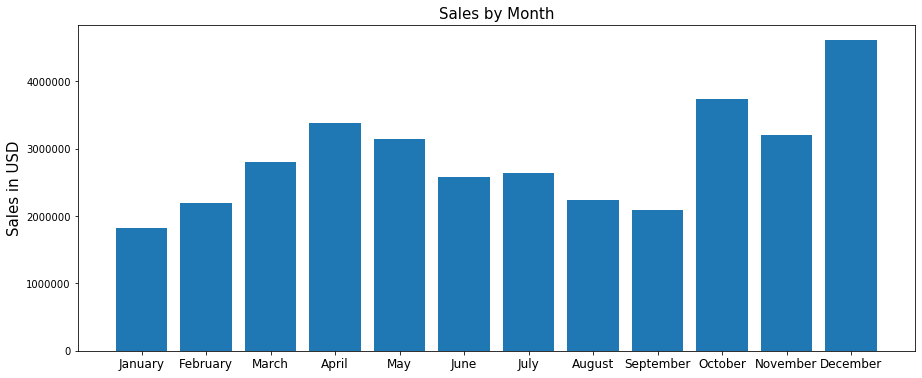

In [16]:
plt.figure(figsize=(15,6))
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

plt.bar(monthly_sales.index, monthly_sales['Sales'])
plt.title("Sales by Month",fontsize=15)
plt.xticks(range(1,13),months,fontsize=12)
plt.ylabel("Sales in USD",fontsize=15)
plt.show()

### Sales by City

**Create City column**

In [17]:
# expand=True return the split string with each value in a diff. column.
# Then we only pick the column we need(in this case at index=1)
# clean_data['City'] = clean_data['Purchase Address'].str.split(',',expand=True)[1]
# clean_data
# The above only strips the city name alone. We need to include state as well in the City column.

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    # [2] will return the state part of the address split. The second split func is used to return only state 
    # and leave out pincode
    return address.split(',')[2].split(' ')[1]


# f"....." is a python 3.5+ string fromatting method:
# val = 'Geeks'
# print(f"{val}for{val} is a portal for {val}.") 
# makes it easier to format string...can avoid multiple usage of func1+ "" + "(" +func2 + ")" to get CITY + (STATE) etc.
clean_data['City'] = clean_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
clean_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
69397,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1,2.99,Boston (MA)
70773,144300,Apple Airpods Headphones,1,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1,150.00,San Francisco (CA)
70772,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1,389.99,San Francisco (CA)
70771,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1,14.95,Los Angeles (CA)
70770,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1,300.00,Atlanta (GA)
...,...,...,...,...,...,...,...,...,...
47162,311693,27in FHD Monitor,1,149.99,12/06/19 18:05,"594 9th St, Dallas, TX 75001",12,149.99,Dallas (TX)
47163,311694,AAA Batteries (4-pack),1,2.99,12/19/19 07:35,"905 11th St, Atlanta, GA 30301",12,2.99,Atlanta (GA)
47164,311695,Wired Headphones,1,11.99,12/21/19 21:06,"107 Lakeview St, San Francisco, CA 94016",12,11.99,San Francisco (CA)
47142,311673,USB-C Charging Cable,1,11.95,12/26/19 22:24,"169 Forest St, San Francisco, CA 94016",12,11.95,San Francisco (CA)


In [18]:
sales_by_city = clean_data.groupby('City').sum().sort_values('Sales',ascending=False)
sales_by_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Seattle (WA),16553,2.733296e+06,104941,2.747755e+06
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06


**Answer:** From the above table it is clear that San Francisco had the highest Sales

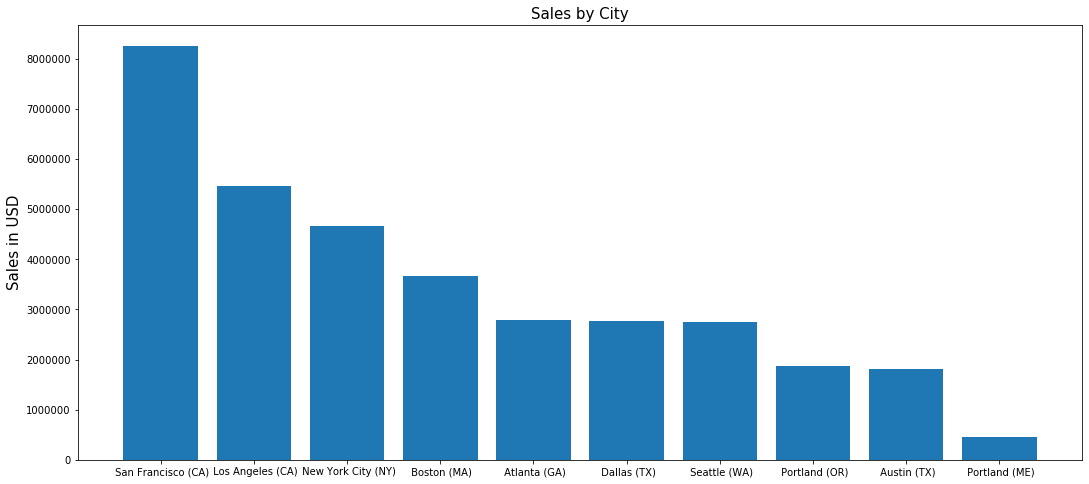

In [19]:
plt.figure(figsize=(18,8))

plt.bar(sales_by_city.index, sales_by_city['Sales'])
plt.title("Sales by City",fontsize=15)
plt.ylabel("Sales in USD",fontsize=15)
plt.show()

### Sales by Time

**Create columns for Hour and Minute**

In [20]:
clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
69397,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1,2.99,Boston (MA)
70773,144300,Apple Airpods Headphones,1,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1,150.00,San Francisco (CA)
70772,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1,389.99,San Francisco (CA)
70771,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1,14.95,Los Angeles (CA)
70770,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1,300.00,Atlanta (GA)


In [21]:
sum(clean_data['Order Date'].isna())

0

In [22]:
# convert order date column to datetime format:
clean_data['Order Date'] = pd.to_datetime(clean_data['Order Date'])

In [24]:
clean_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
69397,142996,AAA Batteries (4-pack),1,2.99,2019-01-01 21:01:00,"402 Chestnut St, Boston, MA 02215",1,2.99,Boston (MA)
70773,144300,Apple Airpods Headphones,1,150.00,2019-01-11 14:22:00,"532 River St, San Francisco, CA 94016",1,150.00,San Francisco (CA)
70772,144299,27in 4K Gaming Monitor,1,389.99,2019-01-31 19:57:00,"942 North St, San Francisco, CA 94016",1,389.99,San Francisco (CA)
70771,144298,Lightning Charging Cable,1,14.95,2019-01-13 12:00:00,"709 North St, Los Angeles, CA 90001",1,14.95,Los Angeles (CA)
70770,144297,Flatscreen TV,1,300.00,2019-01-21 14:37:00,"437 Madison St, Atlanta, GA 30301",1,300.00,Atlanta (GA)
...,...,...,...,...,...,...,...,...,...
47162,311693,27in FHD Monitor,1,149.99,2019-12-06 18:05:00,"594 9th St, Dallas, TX 75001",12,149.99,Dallas (TX)
47163,311694,AAA Batteries (4-pack),1,2.99,2019-12-19 07:35:00,"905 11th St, Atlanta, GA 30301",12,2.99,Atlanta (GA)
47164,311695,Wired Headphones,1,11.99,2019-12-21 21:06:00,"107 Lakeview St, San Francisco, CA 94016",12,11.99,San Francisco (CA)
47142,311673,USB-C Charging Cable,1,11.95,2019-12-26 22:24:00,"169 Forest St, San Francisco, CA 94016",12,11.95,San Francisco (CA)


In [25]:
clean_data['Hour'] = clean_data['Order Date'].dt.hour
clean_data['Minute'] = clean_data['Order Date'].dt.minute
clean_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
69397,142996,AAA Batteries (4-pack),1,2.99,2019-01-01 21:01:00,"402 Chestnut St, Boston, MA 02215",1,2.99,Boston (MA),21,1
70773,144300,Apple Airpods Headphones,1,150.00,2019-01-11 14:22:00,"532 River St, San Francisco, CA 94016",1,150.00,San Francisco (CA),14,22
70772,144299,27in 4K Gaming Monitor,1,389.99,2019-01-31 19:57:00,"942 North St, San Francisco, CA 94016",1,389.99,San Francisco (CA),19,57
70771,144298,Lightning Charging Cable,1,14.95,2019-01-13 12:00:00,"709 North St, Los Angeles, CA 90001",1,14.95,Los Angeles (CA),12,0
70770,144297,Flatscreen TV,1,300.00,2019-01-21 14:37:00,"437 Madison St, Atlanta, GA 30301",1,300.00,Atlanta (GA),14,37
...,...,...,...,...,...,...,...,...,...,...,...
47162,311693,27in FHD Monitor,1,149.99,2019-12-06 18:05:00,"594 9th St, Dallas, TX 75001",12,149.99,Dallas (TX),18,5
47163,311694,AAA Batteries (4-pack),1,2.99,2019-12-19 07:35:00,"905 11th St, Atlanta, GA 30301",12,2.99,Atlanta (GA),7,35
47164,311695,Wired Headphones,1,11.99,2019-12-21 21:06:00,"107 Lakeview St, San Francisco, CA 94016",12,11.99,San Francisco (CA),21,6
47142,311673,USB-C Charging Cable,1,11.95,2019-12-26 22:24:00,"169 Forest St, San Francisco, CA 94016",12,11.95,San Francisco (CA),22,24


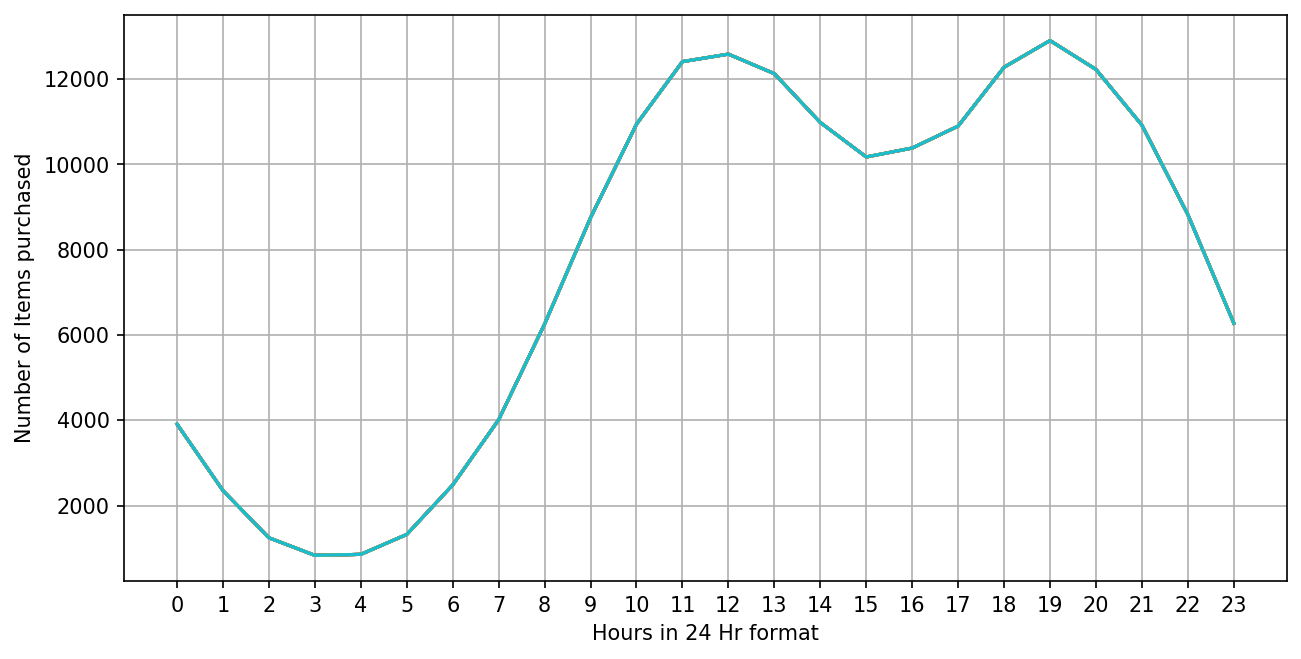

In [26]:
hours = [hour for hour, df in clean_data.groupby('Hour')]

plt.figure(figsize=(10,5),dpi=150)
plt.plot(hours, clean_data.groupby('Hour').count())
plt.xticks(range(clean_data.Hour.min(),clean_data.Hour.max()+1))
plt.ylabel("Number of Items purchased")
plt.xlabel("Hours in 24 Hr format")
plt.grid()
plt.show()

## Sales by Product Groups

In [40]:
group_prods = clean_data.loc[clean_data['Order ID'].duplicated(keep=False)] 

In [41]:
group_prods.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
70744,144271,Lightning Charging Cable,1,14.95,2019-01-28 23:02:00,"2 Cherry St, San Francisco, CA 94016",1,14.95,San Francisco (CA),23,2
70743,144271,iPhone,1,700.00,2019-01-28 23:02:00,"2 Cherry St, San Francisco, CA 94016",1,700.00,San Francisco (CA),23,2
70813,144339,iPhone,1,700.00,2019-01-21 14:33:00,"953 Hickory St, Los Angeles, CA 90001",1,700.00,Los Angeles (CA),14,33
70814,144339,Wired Headphones,1,11.99,2019-01-21 14:33:00,"953 Hickory St, Los Angeles, CA 90001",1,11.99,Los Angeles (CA),14,33
70820,144344,USB-C Charging Cable,1,11.95,2019-01-25 22:26:00,"188 14th St, Boston, MA 02215",1,11.95,Boston (MA),22,26


In [42]:
group_prods['Grouped'] = group_prods.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-42-cd234e7fe153>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_prods['Grouped'] = group_prods.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [43]:
group_prods

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
70744,144271,Lightning Charging Cable,1,14.95,2019-01-28 23:02:00,"2 Cherry St, San Francisco, CA 94016",1,14.95,San Francisco (CA),23,2,"Lightning Charging Cable,iPhone"
70743,144271,iPhone,1,700.00,2019-01-28 23:02:00,"2 Cherry St, San Francisco, CA 94016",1,700.00,San Francisco (CA),23,2,"Lightning Charging Cable,iPhone"
70813,144339,iPhone,1,700.00,2019-01-21 14:33:00,"953 Hickory St, Los Angeles, CA 90001",1,700.00,Los Angeles (CA),14,33,"iPhone,Wired Headphones"
70814,144339,Wired Headphones,1,11.99,2019-01-21 14:33:00,"953 Hickory St, Los Angeles, CA 90001",1,11.99,Los Angeles (CA),14,33,"iPhone,Wired Headphones"
70820,144344,USB-C Charging Cable,1,11.95,2019-01-25 22:26:00,"188 14th St, Boston, MA 02215",1,11.95,Boston (MA),22,26,"USB-C Charging Cable,Google Phone"
...,...,...,...,...,...,...,...,...,...,...,...,...
47187,311715,Flatscreen TV,1,300.00,2019-12-13 01:09:00,"503 Wilson St, Los Angeles, CA 90001",12,300.00,Los Angeles (CA),1,9,"Flatscreen TV,AAA Batteries (4-pack)"
47188,311715,AAA Batteries (4-pack),1,2.99,2019-12-13 01:09:00,"503 Wilson St, Los Angeles, CA 90001",12,2.99,Los Angeles (CA),1,9,"Flatscreen TV,AAA Batteries (4-pack)"
47167,311697,USB-C Charging Cable,1,11.95,2019-12-12 07:29:00,"216 9th St, Austin, TX 73301",12,11.95,Austin (TX),7,29,"USB-C Charging Cable,Vareebadd Phone"
47166,311697,Vareebadd Phone,1,400.00,2019-12-12 07:29:00,"216 9th St, Austin, TX 73301",12,400.00,Austin (TX),7,29,"USB-C Charging Cable,Vareebadd Phone"


In [45]:
group_prods = group_prods[['Order ID','Grouped']].drop_duplicates()
group_prods.head(100)

,Order ID,Grouped
70744,144271,"Lightning Charging Cable,iPhone"
70813,144339,"iPhone,Wired Headphones"
70820,144344,"USB-C Charging Cable,Google Phone"
70870,144394,"Google Phone,Wired Headphones"
71073,144584,"USB-C Charging Cable,Google Phone"
...,...,...
71652,145125,"Google Phone,USB-C Charging Cable"
71670,145141,"AAA Batteries (4-pack),Apple Airpods Headphones"
71756,145221,"Apple Airpods Headphones,Flatscreen TV"
71735,145201,"Wired Headphones,Google Phone"


In [57]:
# clean_data.to_csv("clean_data.csv",index=False)